In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import PIL
import PIL.Image


# Load Data 

In [76]:
data = 'flowers'


# Split

In [78]:
image_size = (180,180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split = 0.4,
    subset = 'training',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split = 0.4,
    subset = 'validation',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size)

Found 4323 files belonging to 5 classes.
Using 2594 files for training.
Found 4323 files belonging to 5 classes.
Using 1729 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


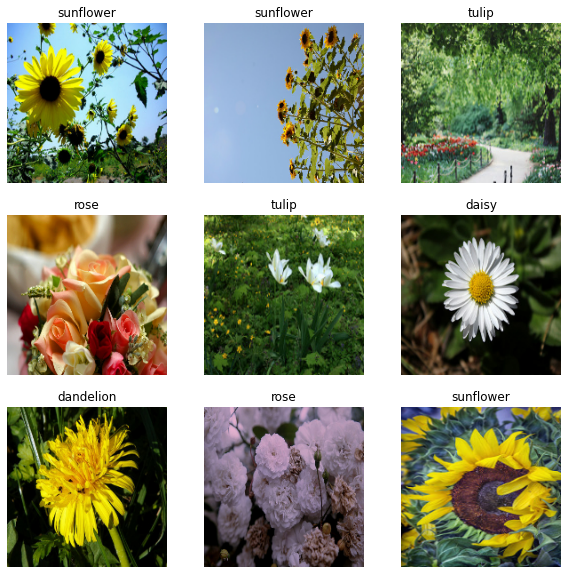

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

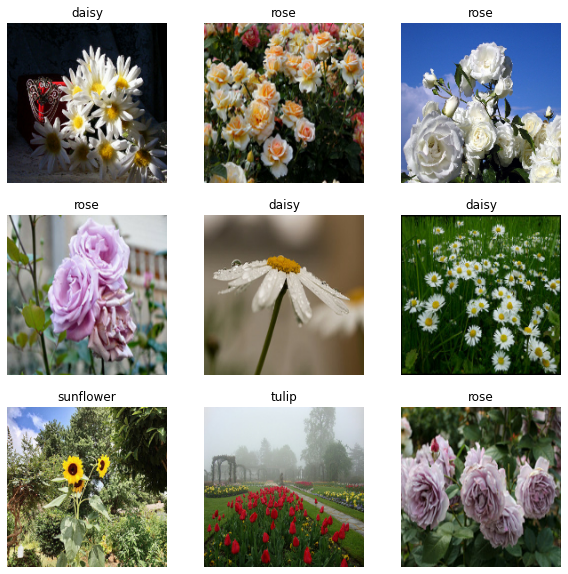

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Encode labels

In [36]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [37]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


# Create Model

In [67]:
num_classes = 5
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

# Compilation Step

In [70]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Train the Model (system is too much slow)

In [71]:
history = model.fit(train_ds,epochs=5,batch_size=32)

Epoch 1/5
82/82 [==============================] - 62s 760ms/step - loss: 1.3704 - accuracy: 0.5189
Epoch 2/5
82/82 [==============================] - 60s 735ms/step - loss: 1.3304 - accuracy: 0.5254
Epoch 3/5
82/82 [==============================] - 58s 702ms/step - loss: 1.2861 - accuracy: 0.5439
Epoch 4/5
82/82 [==============================] - 59s 725ms/step - loss: 1.2359 - accuracy: 0.5625
Epoch 5/5
82/82 [==============================] - 59s 722ms/step - loss: 1.2003 - accuracy: 0.5694


In [60]:
train_loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, 26)

print('Training Loss: ' + str(train_loss[-1]))
print('*'*20)
print('Accuracy' + str(accuracy[-1]))

Training Loss: 0.005619804374873638
********************
Accuracy0.9976869821548462


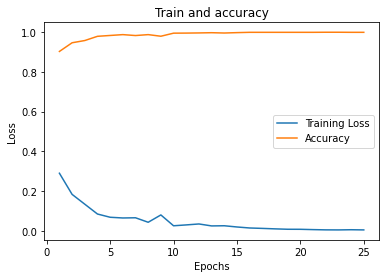

In [61]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Train and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation 

In [62]:
test_loss, test_acc = model.evaluate(test_ds)
print('test_acc:', test_acc)

55/55 [==============================] - 9s 167ms/step - loss: 2.4123 - accuracy: 0.6368
test_acc: 0.6367842555046082


# Prediction

In [63]:
model.predict(test_ds)

array([[ 16.764034  ,   4.1194854 ,  12.925868  , -18.87938   ,
         -0.037387  ],
       [  1.4634492 ,  12.80209   ,  -2.8841763 ,  -8.11437   ,
         -1.0602883 ],
       [ -3.601198  ,  10.970082  ,  -3.8827372 ,   1.9283715 ,
          1.959813  ],
       ...,
       [  2.2371776 ,  13.918455  ,   4.3528757 ,  -9.844251  ,
         -6.9083533 ],
       [  5.203633  ,   5.4042125 ,   0.97951394,  -9.801703  ,
          8.549647  ],
       [ -8.55779   ,  -0.6595757 ,  -5.185257  ,  10.592019  ,
          1.2498375 ]], dtype=float32)